## 회귀 분석 (Regression)
    - 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
    - 최적의 weight, bias를 결정 (regression coefficient -> 회귀 계수 찾기)    
    -  유형
        - 단일 회귀: 독립변수 개수 1개, 선형 회귀 
        - 다중 회귀: 독립변수 개수 2개, 비션형 회귀
        - 다항 회귀: 여러개의 항이 존재하는 식
    - 선형 회귀는 입력 피처의 독립성에 많은 영향을 받는다.--> 피쳐들은 서로 독립적이어야 한다.
    - 피처 셀렉션, 익스트렉션, 규제를 이용해서 피쳐간의 다중 공선성 문제를(mullti-collinerity)문제를 해결해야 한다 !!!
    - 피쳐간의 상관관계가 높다면, 분산이 매우 커져서 오류에 매우 민감해진다
    

* 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
* 릿지(Ridge)
* 라소(Lasso)
* 엘라스틱(ElasticNet)
* 로지스틱 회귀(Logistic Regression)


### RSS(residual) = (1/N) * ∑ (예측값 - 실제값)^2 = 비용함수(Cost function) = 손실함수(loss function)

* 경사 하강법(Gradient Descent):
    - 점진적으로 반복적인 계산을 통해 w파라미터 값을 덥데이트하면서, 오류 값이 최소가 되는 w파라미터를 구하는 방식
    - RSS를 최소화하는 방법
* 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주한다 ---> 그때의 w를 반환한다
* 대입 방법 : smarter steps, cheaper steps, too small steps, too large steps
* 일반적으로 배치 경사 하강법을 사용 
* 확률적 경사 하강법 : 빠르고 효율적이다
* 학습률(learning rate): 학습률을 설정해서 새로운 회귀계수를 구한다
* 학습률 결정에는 배치하강법, 확률적 경사 하강법등등이 있고 이를 구하는 방법을 optimizer이라고 한다
* 에포크수(epoch): 학습 횟수

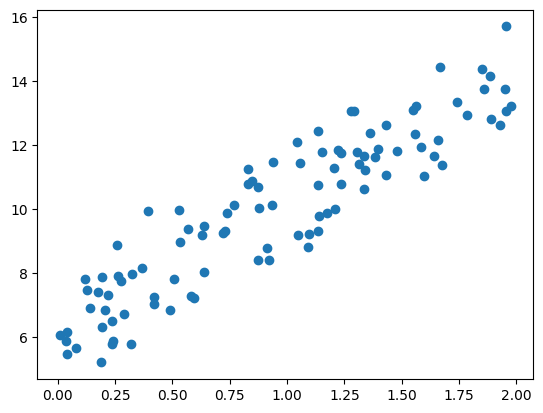

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X= 2*np.random.rand(100,1)
y= 6+4*X +np.random.randn(100,1)

plt.scatter(X,y)


In [94]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)

    y_pred= np.dot(X,w1.T)+w0
    diff=y-y_pred

    w0_factors= np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update= -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

    return w1_update, w0_update

In [95]:
def gradient_descent_steps(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1,w0

In [96]:
def get_cost(y,y_pred):
    N=len(y)
    cost= np.sum(np.square(y-y_pred))/N
    return cost

In [97]:
iters =[100,200,300,400,500,600,700,800,900,1000]

for i in iters:
    w1,w0= gradient_descent_steps(X,y,iters=i)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred=w1[0,0]*X +w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:4.862, w0:5.058
Gradient Descent Total Cost:1.3596
w1:4.671, w0:5.428
Gradient Descent Total Cost:1.1733
w1:4.478, w0:5.648
Gradient Descent Total Cost:1.0873
w1:4.338, w0:5.806
Gradient Descent Total Cost:1.0422
w1:4.236, w0:5.921
Gradient Descent Total Cost:1.0186
w1:4.162, w0:6.004
Gradient Descent Total Cost:1.0062
w1:4.109, w0:6.064
Gradient Descent Total Cost:0.9996
w1:4.070, w0:6.108
Gradient Descent Total Cost:0.9962
w1:4.042, w0:6.139
Gradient Descent Total Cost:0.9944
w1:4.022, w0:6.162
Gradient Descent Total Cost:0.9935


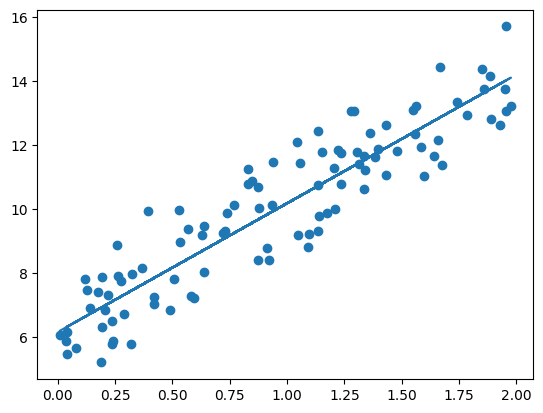

In [98]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [99]:
for i in range(1000):
    w1,w0= gradient_descent_steps(X,y,iters=i)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred=w1[0,0]*X +w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:0.000, w0:0.000
Gradient Descent Total Cost:105.7228
w1:0.215, w0:0.199
Gradient Descent Total Cost:97.2970
w1:0.421, w0:0.391
Gradient Descent Total Cost:89.5527
w1:0.618, w0:0.575
Gradient Descent Total Cost:82.4348
w1:0.807, w0:0.751
Gradient Descent Total Cost:75.8925
w1:0.988, w0:0.920
Gradient Descent Total Cost:69.8793
w1:1.162, w0:1.083
Gradient Descent Total Cost:64.3524
w1:1.328, w0:1.238
Gradient Descent Total Cost:59.2724
w1:1.487, w0:1.388
Gradient Descent Total Cost:54.6032
w1:1.639, w0:1.532
Gradient Descent Total Cost:50.3115
w1:1.785, w0:1.670
Gradient Descent Total Cost:46.3668
w1:1.925, w0:1.802
Gradient Descent Total Cost:42.7410
w1:2.058, w0:1.929
Gradient Descent Total Cost:39.4083
w1:2.186, w0:2.051
Gradient Descent Total Cost:36.3450
w1:2.309, w0:2.168
Gradient Descent Total Cost:33.5293
w1:2.426, w0:2.281
Gradient Descent Total Cost:30.9412
w1:2.539, w0:2.389
Gradient Descent Total Cost:28.5621
w1:2.646, w0:2.492
Gradient Descent Total Cost:26.3753
w1:2.749,

In [100]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost= 100000
    iter_index=0

    for ind in range(iters):
        stochastic_random_index= np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        w1_update,w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1,w0

In [101]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [102]:
for i in range(1000):
    w1,w0 =stochastic_gradient_descent_steps(X,y,iters=i)
    print("w1:",round(w0[0,0],3), "w0:",round(w0[0,0],3))
    y_pred = w1[0,0]*X +w0
    print(f'Stochastic Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}')

w1: 0.0 w0: 0.0
Stochastic Gradient Descent Total Cost:105.7228
w1: 0.17 w0: 0.17
Stochastic Gradient Descent Total Cost:99.8669
w1: 0.385 w0: 0.385
Stochastic Gradient Descent Total Cost:89.7911
w1: 0.551 w0: 0.551
Stochastic Gradient Descent Total Cost:84.7657
w1: 0.771 w0: 0.771
Stochastic Gradient Descent Total Cost:75.4251
w1: 0.935 w0: 0.935
Stochastic Gradient Descent Total Cost:68.8779
w1: 1.066 w0: 1.066
Stochastic Gradient Descent Total Cost:65.6429
w1: 1.237 w0: 1.237
Stochastic Gradient Descent Total Cost:59.0729
w1: 1.405 w0: 1.405
Stochastic Gradient Descent Total Cost:53.8537
w1: 1.498 w0: 1.498
Stochastic Gradient Descent Total Cost:51.4437
w1: 1.692 w0: 1.692
Stochastic Gradient Descent Total Cost:43.9308
w1: 1.78 w0: 1.78
Stochastic Gradient Descent Total Cost:44.6218
w1: 1.951 w0: 1.951
Stochastic Gradient Descent Total Cost:38.0886
w1: 2.053 w0: 2.053
Stochastic Gradient Descent Total Cost:36.7494
w1: 2.181 w0: 2.181
Stochastic Gradient Descent Total Cost:31.7727
w1

## sklearn.linear_model.LinearRegression
* class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
* 기본 경사 하강법
* coef_: 학습했을때의 최종 결정된 Estimated coefficients들

## sklearn.linear_model.SGDRegressor
* class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
* 확률적 경사 하강법 (Stochastic Gradient Descent)

### 평가지표 : 
    - MAE : metrics.mean_absolute_error(y_true, y_pred, *), Mean absolute error regression los
        - neg_mean_absolute_error
    - MSE : metrics.mean_squared_error(y_true, y_pred, *), Mean squared error regression loss.
        - neg_mean_squared_error
    - RMSE
    - R^2

#### 다중공선성(-->overfitting)과 변수 선택
* 회귀 분석할때 다중공선성 문제를 해결해 봐야된다.
* standardScaling
* VIF : from statsmodels.stats.outliers_influence import variance_inflation_factor
    - 10이상이면 다중공선성이 크다
* 상관계수 :corr()--> 히트맵(heatmap)
* feature_extraction ---> 주성분 분석

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

diabetes=load_diabetes()
X_train,X_test,y_train,y_test= train_test_split(diabetes.data,diabetes.target,test_size=0.2, random_state=0)

model=LinearRegression()
model.fit(X_train,y_train)




LinearRegression()

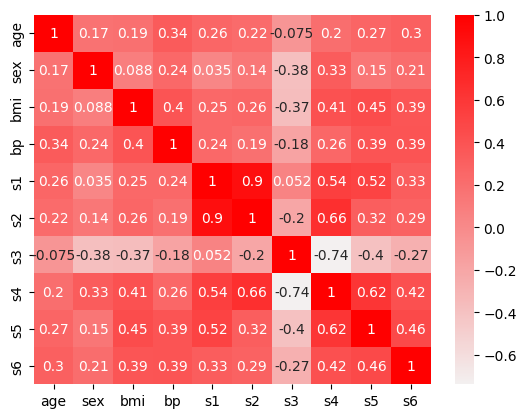

In [14]:
df_diabetes=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes.corr()
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(df_diabetes.corr(), annot=True, cmap=cmap)
plt.show()

In [15]:
## 처음 데이터 그대로
from sklearn.metrics import mean_squared_error,r2_score
y_target=diabetes.target
X_data=df_diabetes
X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.2, random_state=0)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 3424.259, RMSE:58.517
Variance score:0.332


In [16]:
## (s1,s4)drop한 것
from sklearn.metrics import mean_squared_error,r2_score
y_target=diabetes.target
X_data=df_diabetes.drop(['s5','s2'],axis=1)
X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.2, random_state=0)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 3477.308, RMSE:58.969
Variance score:0.322


In [17]:
## StandardScaler해서 한 거
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df_diabetes)
df_diabete =scaler.transform(df_diabetes)

y_target=diabetes.target
X_data=df_diabete
X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.2, random_state=0)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 3424.259, RMSE:58.517
Variance score:0.332


In [18]:
# pip install statsmodels

In [53]:
boston_df=pd.read_csv("../datasets/Boston.csv",index_col=0)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


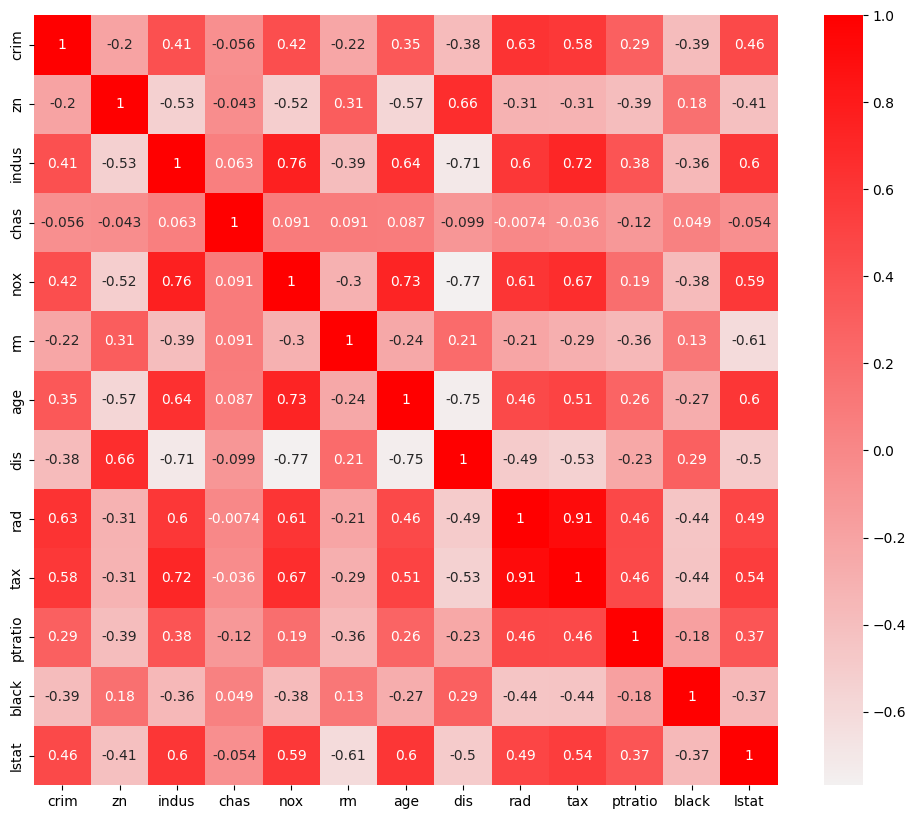

In [54]:
from sklearn.preprocessing import StandardScaler

y_target=boston_df['medv']
X_data= boston_df.drop('medv',axis=1)

scaler=StandardScaler()
scaler.fit(X_data)
X_data_scaler= scaler.transform(X_data)                                   ## X_data standardScaling

boston_df_scaler=pd.DataFrame(data=X_data_scaler, columns=X_data.columns)
plt.figure(figsize=(12, 10))                                              ## boston_df_scaler이라는 새로운 데이터 프레임
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(boston_df_scaler.corr(), annot=True, cmap=cmap)
plt.show()

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_data_scaler,y_target,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 17.297, RMSE:4.159
Variance score:0.757


In [39]:
boston_df_scaler.drop(['tax','dis'],axis=1,inplace=True)

In [40]:

X_train,X_test,y_train,y_test = train_test_split(boston_df_scaler,y_target,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 17.687, RMSE:4.206
Variance score:0.752


## sklearn.ensemble.RandomForestRegressor
* class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
* parameters
    - n_estimators : integer, optional (default=10) , The number of trees in the forest.
    - bootstrap : boolean, optional (default=True) , Whether bootstrap samples are used when building trees. True=베깅
    - criterion : string, optional (default=”mse”) , 'mse' (평균제곱오차)

In [57]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
rf_clf.fit(X_train,y_train)
y_preds2=rf_clf.predict(X_test)

mse= mean_squared_error(y_test,y_preds2)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds2):.3f}")

MSE : 7.309, RMSE:2.703
Variance score:0.897


## sklearn.ensemble.GradientBoostingRegressor
* class sklearn.ensemble.GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
* parameters
    - n_estimators : int (default=100) , The number of boosting stages to perform
    - criterion : string, optional (default=”friedman_mse”)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

gb_clf= GradientBoostingRegressor(random_state=0)
gb_clf.fit(X_train,y_train)
y_preds3 = gb_clf.predict(X_test)

mse= mean_squared_error(y_test,y_preds3)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds3):.3f}")



MSE : 6.401, RMSE:2.530
Variance score:0.910


## import xgboost as xgb
## from xgboost import XGBRegressor

* 일반 파라미터 - 도구의 모양을 결정
    booster : 어떤 부스터 구조를 쓸지 결정한다. ( gbtree, gblinear, dart)
    - nthread : 몇개의 쓰레드를 동시에 처리하도록 할지 결정한다. 디폴트는 '가능한 많이'
    - num_feature : feature차원의 숫자를 정해야하는 경우 옵션을 세팅. '디폴트는 가능한 많이'
* 부스트 파라미터 - 트리마다 가지를 칠 때 적용하는 옵션을 정의
    - eta: learning rate와 같다. 트리에 가지가 많을 수록 과적합하기 쉽다. 매 부스팅 스탭마다 weight를 주어 부스팅 과정에 과적합이 일어나지 않도록 한다.
    - gamma: 정보흭득(information Gain)에서 -r로 표현한 바 있다. 이것이 커지면, 트리 깊이가 줄어들어 보수적인 모델이 된다. ( 디폴트는 0 )
    - max_depth : 한 트리의 maxium depth. 숫자가를 키울수록 보델의 복잡도가 커진다. 과적합 하기 쉽다. 디폴트는 6, 이 때 리프노트의 개수는 최대 2^6 = 64개이다.
    - lambda (L2 reg-form) : L2 Regularization Form에 달리는 weights이다. 숫자가 클수록 보수적인 모델이 된다.
    - alpha(L1 reg-form) : L1 Regularization Form에 달리는 weights이다. 숫자가 클수록 보수적인 모델이 된다.


In [59]:
import xgboost as xgb ## XGBoost 불러오기

import xgboost as xgb
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
pred_probs = model.predict(X_test)

mse= mean_squared_error(y_test,pred_probs)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,pred_probs):.3f}")


MSE : 6.913, RMSE:2.629
Variance score:0.903


## 다항 선형 회귀
    - 다중 선형 회귀: 일차 방정식

    - 다중 선형 회기(polinomial linear regression) :2차,3차 방정식
        - feature을 늘리는 효과
        - 전처리 단계에서 한다(polinomial방식으로 feature을 늘려서 해본다)
        - 단항 피쳐를 다항 피쳐로 변형(제곱,세제곱..)해서 linearRegression 학습으로 다항회귀를 한다

## sklearn.preprocessing.PolynomialFeatures
* class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

## sklearn.pipeline.Pipeline
* class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)
    * Parameters:
        - steps : list of tuple
        - memory : str or object with the joblib.Memory interface, default=None
        - verbose : bool, default=False
    * Attributes:
        - classes: _ndarray of shape (n_classes,)
            - The classes labels.
        - n_features_in_ : int
           -  Number of features seen during first step fit method.
        - feature_names_in_ : ndarray of shape (n_features_in_,)
           - Names of features seen during first step fit method.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X=np.arange(4).reshape(2,2)
print(X)

[[0 1]
 [2 3]]


In [61]:
poly= PolynomialFeatures(degree=2)      ### degree는 몇 제곱을 하느냐?
poly.fit(X)
poly_ftr=poly.transform(X)
print(poly_ftr)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [62]:
def ploynomial_func(X):
    y = 1 + 2*X + X**2+ X**3
    return y

x=np.arange(4).reshape(2,2)
print('일차 단한식 계수 feature: \n',X)
y=ploynomial_func(X)
print('삼차 다항식 결정값: \n',y)


일차 단한식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [[ 1  5]
 [17 43]]


In [63]:
poly_ftr =PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feautre: \n', poly_ftr)
model= LinearRegression()
model.fit(poly_ftr,y)
# coef_: 학습했을때의 최종 결정된 Estimated coefficients들
print('Polynomial 회귀 계수\n ',np.round(model.coef_,2))
print('Polynomial 회귀 Shape: ',model.coef_.shape)

3차 다항식 계수 feautre: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
  [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape:  (2, 10)


In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def ploynomial_func(X):
    y = 1 + 2*X + X**2+ X**3
    return y

# pipeline 객체로 streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear',LinearRegression())])

x=np.arange(4).reshape(2,2)
y= ploynomial_func(X)

model =model.fit(X,y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

boston_df=pd.read_csv("../datasets/Boston.csv",index_col=0)
boston_target=boston_df['medv']

print(boston_df.shape)
boston_df.head(3)

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [66]:
y_target=boston_df['medv']
X_data= boston_df.drop(['medv'],axis=1,inplace=False)

X_train,X_test,y_train,y_test =train_test_split(X_data,y_target,test_size=0.3,random_state=156)

In [67]:
p_model = Pipeline(memory=None,
                   steps=[('poly',PolynomialFeatures(degree=2,include_bias=False, interaction_only=False,order='C')),
                    ('Linear',LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None))]
                    ,verbose=False)

In [68]:
p_model.fit(X_train,y_train)
y_preds =p_model.predict(X_test)
mse =mean_squared_error(y_test,y_preds)
rmse= np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 15.556, RMSE:3.944
Variance score:0.782
